<a href="https://colab.research.google.com/github/sankar-6/UM-ML-Projects/blob/main/Predicting_Mobile_Phone_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('/content/mobile_pricing_data.csv')
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.shape

(2000, 21)

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
df['price_range'].unique()

array([1, 2, 3, 0])

####Exploratory Data analysis

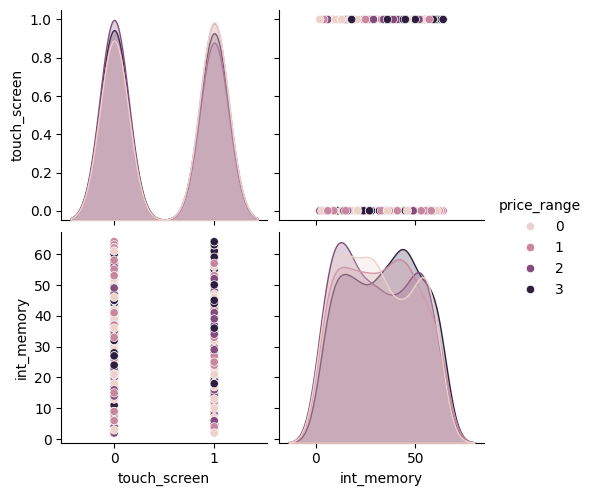

In [10]:
sns.pairplot(df, hue='price_range', vars=['touch_screen','int_memory'])
plt.show()

**Based on these we conclude that the mobile phone which is *'touch phone with max internal memory has high price'***

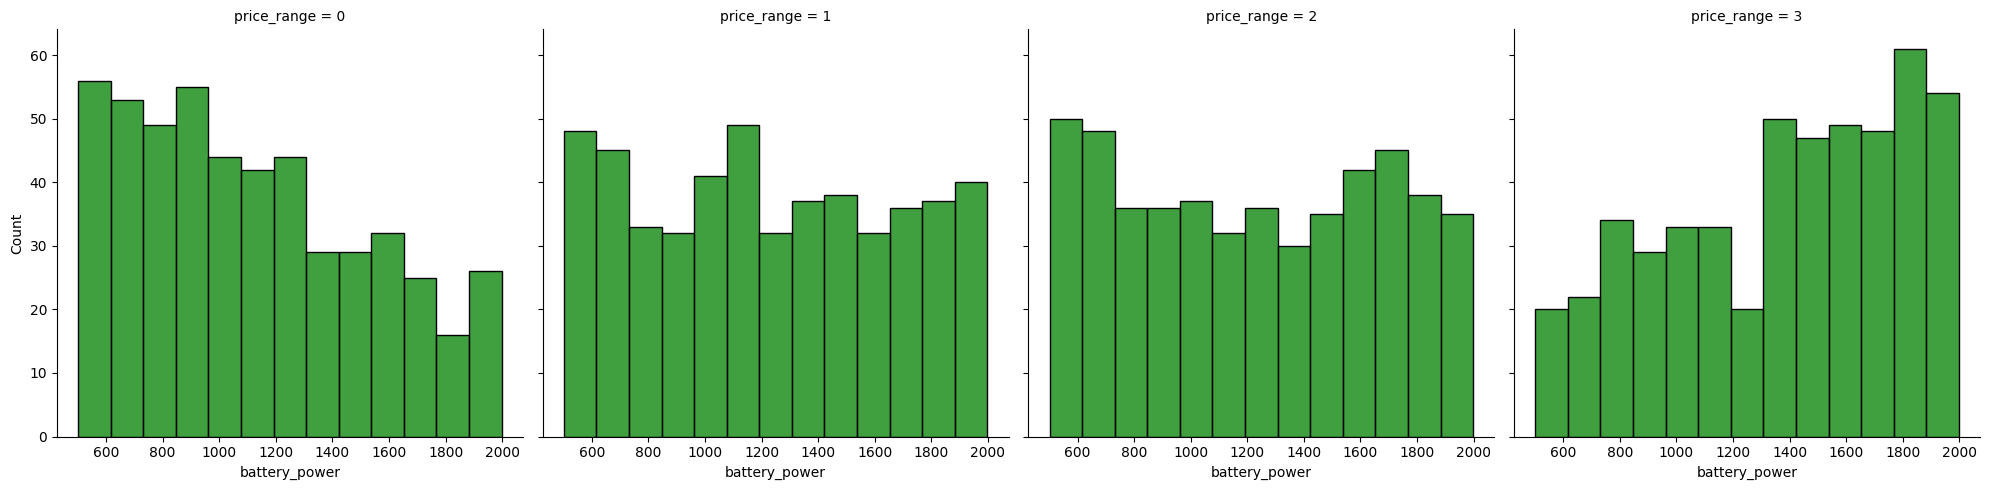

In [11]:
sns.displot(df,x='battery_power',col='price_range',color='green')

<Axes: xlabel='blue', ylabel='count'>

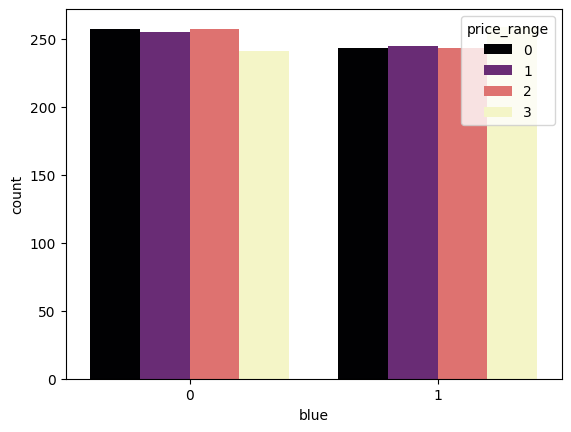

In [12]:
sns.countplot(data=df,x='blue',hue='price_range',palette='magma')

**Pricing is not based on bluetooth is present or not**

<Axes: xlabel='price_range', ylabel='ram'>

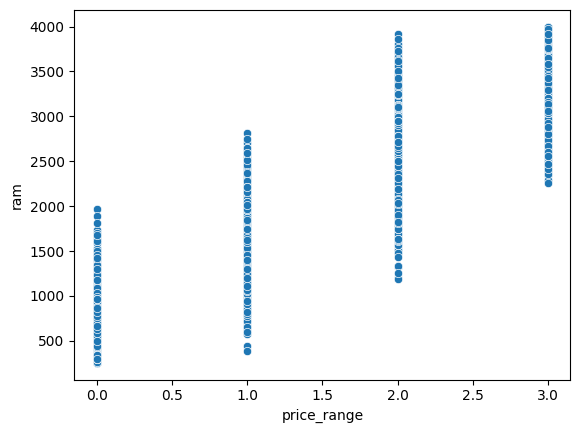

In [13]:
sns.scatterplot(data=df,x='price_range',y='ram')

**We conclude that the price range is predicted based on the one of the characteristic that is *'ram'***

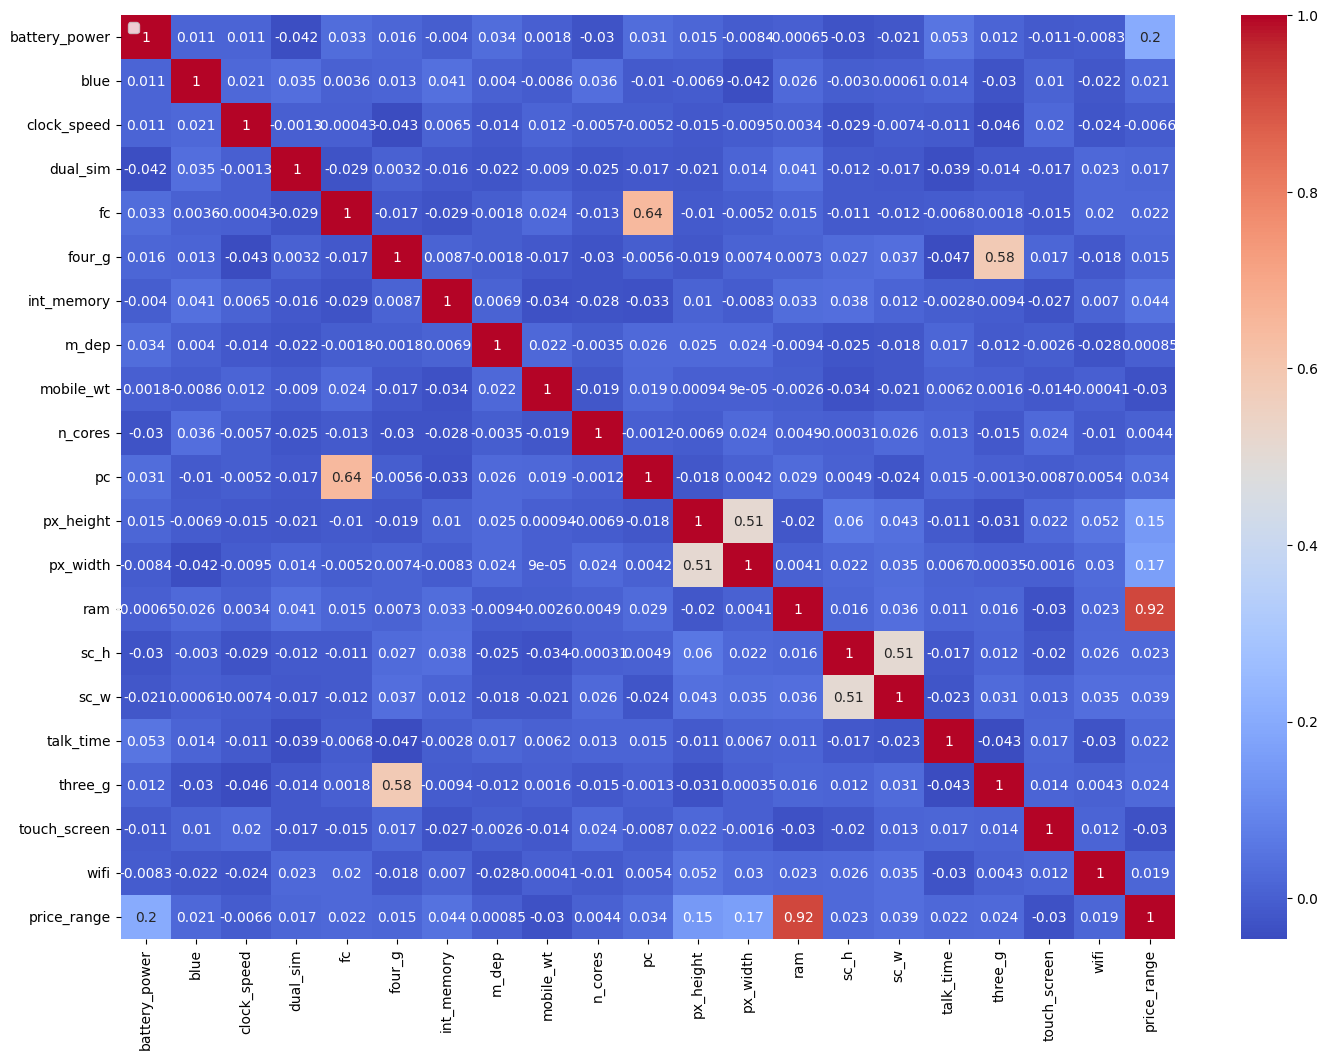

In [14]:
corr=df.corr()
fig = plt.figure(figsize=(17,12))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.legend('Correlation Matrix')

###Model Development

####By using Logistic Regression

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [16]:
scaler=StandardScaler()

In [17]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [18]:
scaler.fit(x)

StandardScaler()

In [19]:
scaled_features=scaler.transform(x)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)

In [21]:
lr=LogisticRegression()

In [22]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
predictions=lr.predict(x_test)

In [24]:
print(confusion_matrix(y_test,predictions))
print()
print(classification_report(y_test,predictions))

[[97 27  1  0]
 [25 65 30  5]
 [ 0 35 57 33]
 [ 0  1 26 98]]

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       125
           1       0.51      0.52      0.51       125
           2       0.50      0.46      0.48       125
           3       0.72      0.78      0.75       125

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.63      0.63      0.63       500



####By using Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc=RandomForestClassifier(n_estimators=100)

In [27]:
rfc.fit(x_train,y_train)
predcitions1=rfc.predict(x_test)

In [28]:
print(confusion_matrix(y_test,predcitions1))
print()
print(classification_report(y_test,predcitions1))

[[118   7   0   0]
 [ 15 101   9   0]
 [  0  20  98   7]
 [  0   0  12 113]]

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       125
           1       0.79      0.81      0.80       125
           2       0.82      0.78      0.80       125
           3       0.94      0.90      0.92       125

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



**Random Forest is Better for Multi Class Classification than Logistic Regression**